In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
data_folder = Path("C:/Users/danie/Documents/py-data-analysis/bls-dev-wages")
file_to_open = data_folder / "bls-dev-wage-2017.csv"

In [3]:
bls_wage_master = pd.read_csv(file_to_open, usecols=['STATE', 'OCC_TITLE', 'A_MEAN'])

In [4]:
bls_dev_wage = bls_wage_master.loc[bls_wage_master['OCC_TITLE'] == 'Software Developers, Applications']

In [5]:
bls_dev_wage = bls_dev_wage.drop(788)

In [6]:
bls_dev_wage = bls_dev_wage.drop(36286)

In [7]:
bls_dev_wage["A_MEAN"] = bls_dev_wage["A_MEAN"].apply(pd.to_numeric)

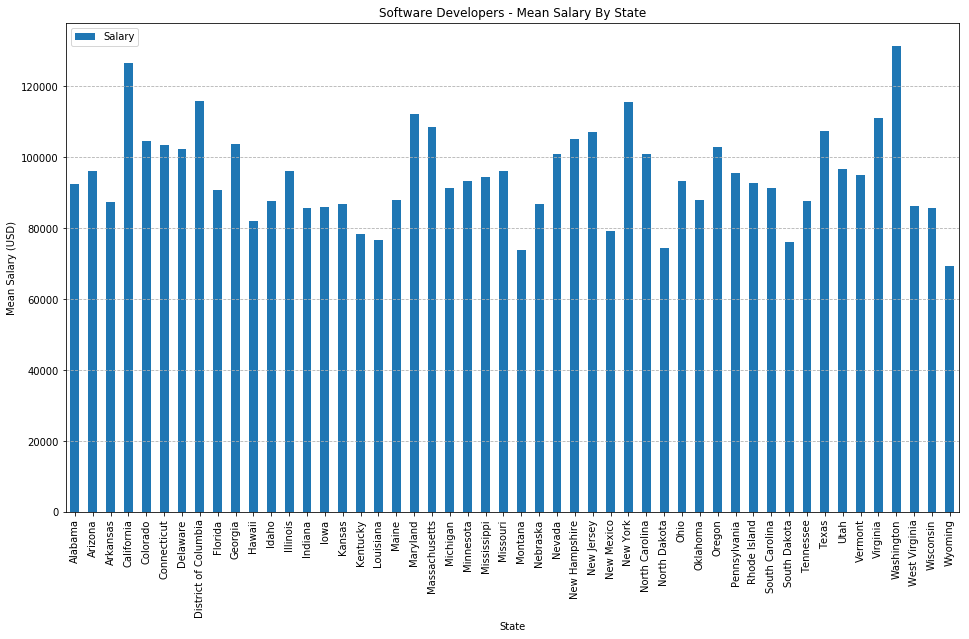

In [8]:
ax = bls_dev_wage.plot.bar(figsize=(16,9))
plt.xlabel("State")
plt.ylabel("Mean Salary (USD)")
plt.title("Software Developers - Mean Salary By State")
ax.set_xticklabels(bls_dev_wage.STATE.values, rotation=90)
ax.yaxis.grid(linestyle="--")
ax.xaxis.grid(False)
ax.legend(['Salary'], loc='upper left')
plt.show()

In [12]:
data_folder = Path("C:/Users/danie/Documents/py-data-analysis/bls-dev-wages")
file_to_open = data_folder / "state_col_index_2017.csv"
state_col_index_2017 = pd.read_csv(file_to_open)

                   STATE  C_O_L
0                Alabama   89.5
1                Arizona   97.7
2               Arkansas   88.4
3             California  138.7
4               Colorado  105.5
5            Connecticut  128.8
6               Delaware  106.0
7   District of Columbia  162.9
8                Florida   98.9
9                Georgia   91.2
10                Hawaii  190.1
11                 Idaho   94.2
12              Illinois   95.7
13               Indiana   90.1
14                  Iowa   91.8
15                Kansas   89.7
16              Kentucky   91.8
17             Louisiana   93.6
18                 Maine  117.2
19              Maryland  131.3
20         Massachusetts  133.8
21              Michigan   89.3
22             Minnesota  101.5
23           Mississippi   85.7
24              Missouri   88.8
25               Montana  104.0
26              Nebraska   93.3
27                Nevada  108.3
28         New Hampshire  109.3
29            New Jersey  122.5
30      

In [19]:
bls_wage_vs_col = pd.merge(bls_dev_wage, state_col_index_2017, on='STATE')

                   STATE                          OCC_TITLE  A_MEAN  C_O_L
0                Alabama  Software Developers, Applications   92360   89.5
1                Arizona  Software Developers, Applications   96120   97.7
2               Arkansas  Software Developers, Applications   87500   88.4
3             California  Software Developers, Applications  126470  138.7
4               Colorado  Software Developers, Applications  104620  105.5
5            Connecticut  Software Developers, Applications  103390  128.8
6               Delaware  Software Developers, Applications  102250  106.0
7   District of Columbia  Software Developers, Applications  115900  162.9
8                Florida  Software Developers, Applications   90770   98.9
9                Georgia  Software Developers, Applications  103630   91.2
10                Hawaii  Software Developers, Applications   82050  190.1
11                 Idaho  Software Developers, Applications   87580   94.2
12              Illinois 

In [18]:
# bls_wage_vs_col.to_csv("C:/Users/danie/Documents/py-data-analysis/bls-dev-wages/bls-wage-vs-col-test.csv", encoding='utf-8', index=False)

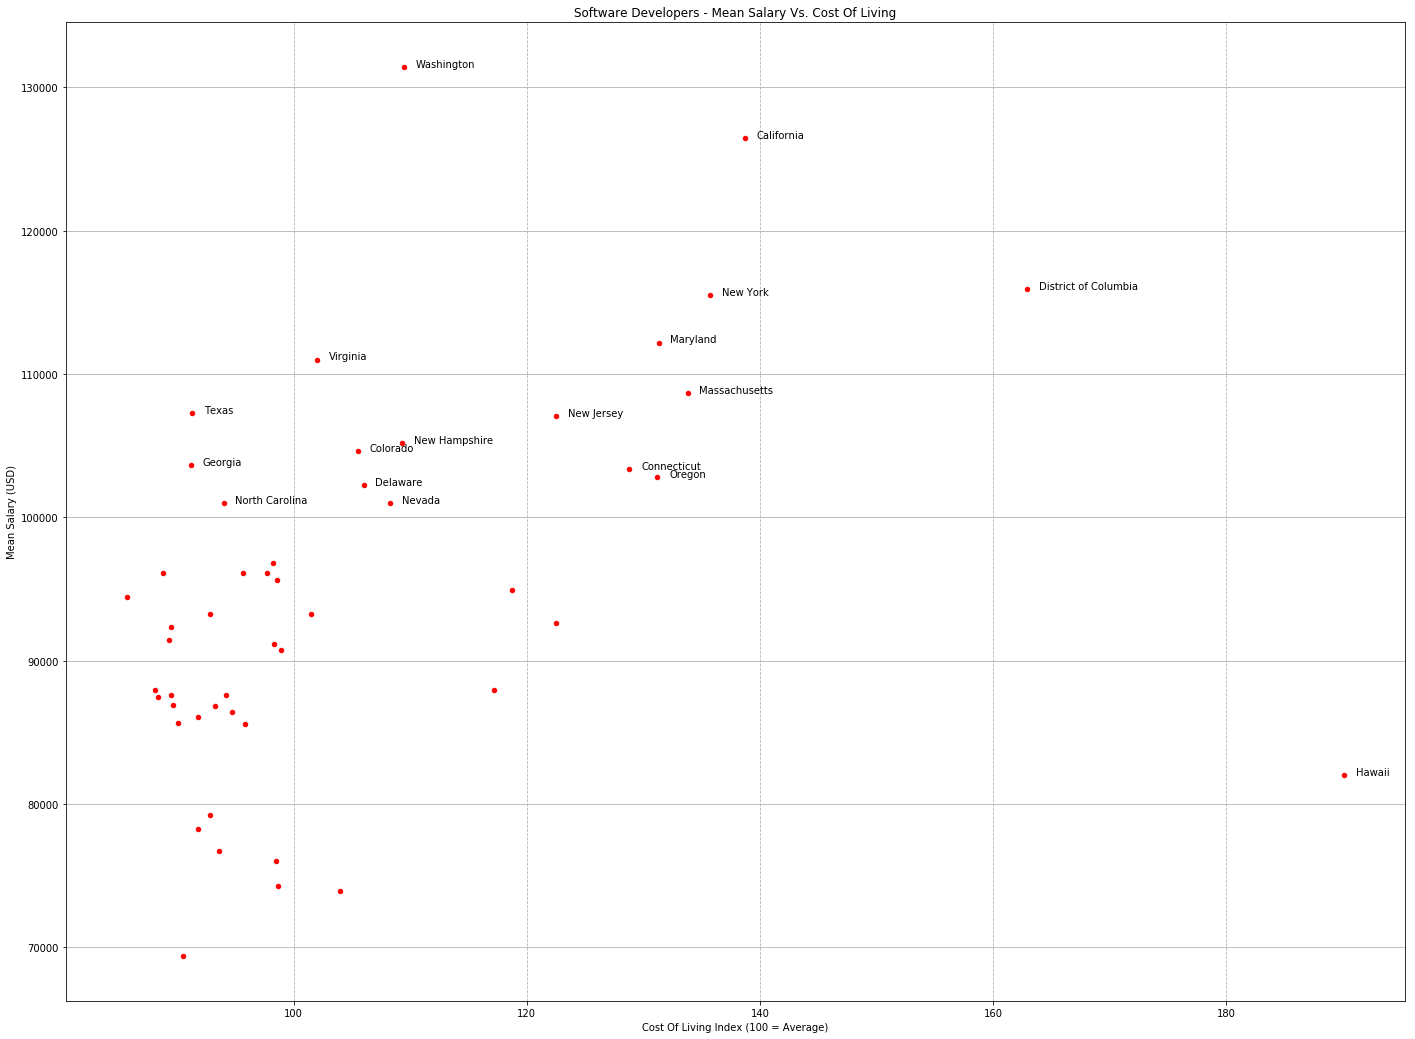

In [51]:
ax = bls_wage_vs_col.plot(kind='scatter', x='C_O_L', y='A_MEAN', color='red',figsize=(24,18))
plt.xlabel("Cost Of Living Index (100 = Average)")
plt.ylabel("Mean Salary (USD)")
plt.title("Software Developers - Mean Salary Vs. Cost Of Living")
ax.yaxis.grid(linestyle="-")
ax.xaxis.grid(linestyle='--')

state = bls_wage_vs_col['STATE']
cost = bls_wage_vs_col['C_O_L']
salary = bls_wage_vs_col['A_MEAN']

for i, txt in enumerate(state):
    if salary[i] < 100000 and cost[i] < 180:
        continue
    ax.annotate(txt, (cost[i], salary[i]), xytext=(cost[i] + 1, salary[i] + 1))

plt.show()

In [26]:
bls_dev_wage['A_MEAN'].max()

131430